In [2]:
from datasets import load_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

/home/dykos0508/.virtualenvs/torch_s/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
dataset_id = "PolyAI/banking77"  # Training dataset

# Load everythings for training
dataset = load_dataset(dataset_id)

In [50]:
lable_mapping_dict = {index:l for index,l in enumerate(dataset['train'].features['label'].names)}

In [72]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
plt.style.use('seaborn-v0_8-notebook')

def plot_label_distribution(dataset_):
    train_labels = [data['label'] for data in dataset_['train']]
    test_labels = [data['label'] for data in dataset_['test']]

    train_label_counts = Counter(train_labels)
    test_label_counts = Counter(test_labels)

    plt.figure(figsize=(8, 5))
    plt.bar(train_label_counts.keys(), train_label_counts.values(), width=0.5, label='Train', color='skyblue')
    plt.bar(test_label_counts.keys(), test_label_counts.values(), width=0.5, label='Test', color='salmon', alpha=0.7)

    plt.legend(fontsize=12)
    plt.xlabel("Label",fontsize=14)
    plt.ylabel("Frequency",fontsize=14)
    plt.title("Label Distribution in Train and Test Sets",fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
    
def show_text_length(dataset_):
    train_text_lengths = [len(example['text'].split()) for example in dataset_['train']]
    test_text_lengths = [len(example['text'].split()) for example in dataset_['test']]
    
    train_mean = np.mean(train_text_lengths)
    train_median = np.median(train_text_lengths)
    test_mean = np.mean(test_text_lengths)
    test_median = np.median(test_text_lengths)
    
    plt.figure(figsize=(8, 5))
    plt.hist(train_text_lengths, bins=50, alpha=0.7, label=f'Train (mean={train_mean:.2f}, median={train_median})', color='skyblue')
    plt.hist(test_text_lengths, bins=50, alpha=0.7, label=f'Test (mean={test_mean:.2f}, median={test_median})', color='salmon')

    plt.legend(fontsize=14)
    plt.title("Text Length Distribution", fontsize=16)
    plt.xlabel("Text Length", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

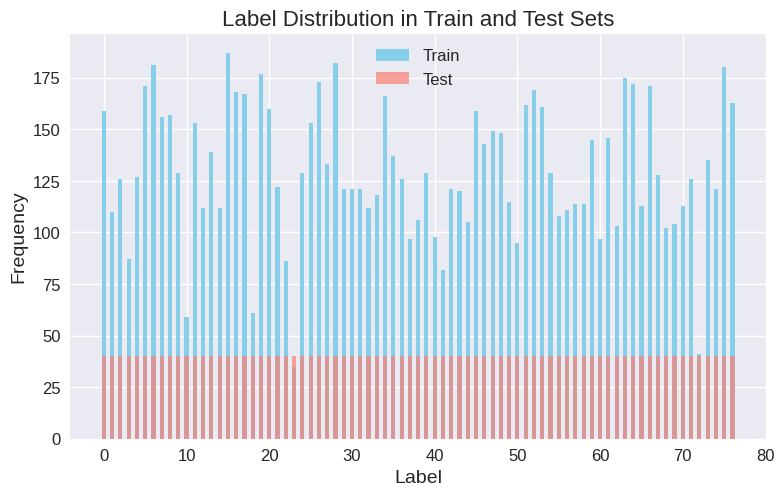

In [131]:
plot_label_distribution(dataset)

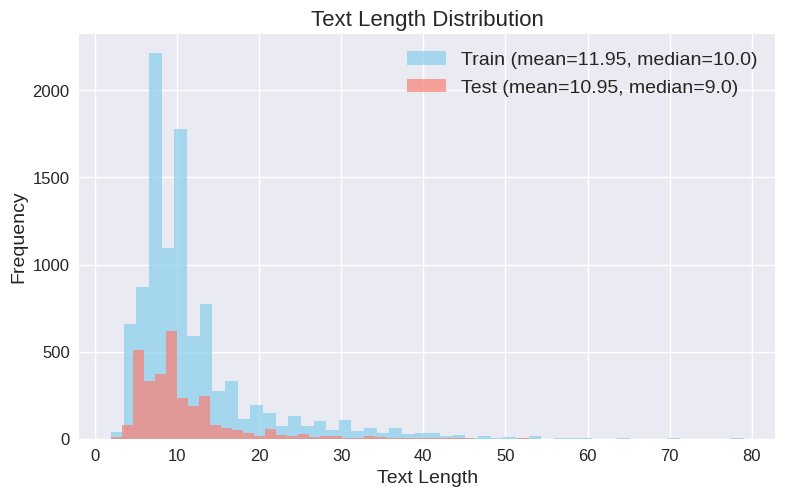

In [132]:
show_text_length(dataset)

### Train

In [115]:
np.mean([len(example['text'].split()) for example in dataset['train']])

11.949415175447365

In [112]:
np.median([len(example['text'].split()) for example in dataset['train']])

10.0

### Test

In [117]:
np.mean([len(example['text'].split()) for example in dataset['test']])

10.952597402597403

In [113]:
np.median([len(example['text'].split()) for example in dataset['test']])

9.0

### 訓練集類別數太少的

In [141]:
def find_rare_classes(dataset_):

    train_labels = [data['label'] for data in dataset_['train']]
    train_label_counts = Counter(train_labels)

    rare_classes = {"{}({})".format(label,lable_mapping_dict[label]): count for label, count in train_label_counts.items() if count < 80}

    return rare_classes

# 調用函數來獲取少於 80 的類別
rare_classes = find_rare_classes(dataset)
rare_classes

{'23(contactless_not_working)': 35,
 '10(card_acceptance)': 59,
 '18(card_swallowed)': 61,
 '72(virtual_card_not_working)': 41}